In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import keras

In [13]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [14]:
train_dataset = train.flow_from_directory('data/training/',
                                         target_size = (200,200),
                                         batch_size = 2,
                                         class_mode='binary')

Found 20 images belonging to 2 classes.


In [15]:
validation_dataset = validation.flow_from_directory('data/validation/',
                                         target_size = (200,200),
                                         batch_size = 2,
                                         class_mode='binary')

Found 10 images belonging to 2 classes.


In [16]:
train_dataset.class_indices

{'covid': 0, 'normal': 1}

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Flatten(),
    ##
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [18]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics=['accuracy'])

In [21]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 50,
                     validation_data= validation_dataset)

Epoch 1/50
3/3 [==============================] - 1s 351ms/step - loss: 0.0680 - accuracy: 1.0000 - val_loss: 0.6590 - val_accuracy: 0.7000
Epoch 2/50
3/3 [==============================] - 1s 322ms/step - loss: 0.2423 - accuracy: 0.8333 - val_loss: 0.4204 - val_accuracy: 0.9000
Epoch 3/50
3/3 [==============================] - 1s 325ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.4220 - val_accuracy: 0.8000
Epoch 4/50
3/3 [==============================] - 1s 329ms/step - loss: 0.0919 - accuracy: 1.0000 - val_loss: 1.7150 - val_accuracy: 0.6000
Epoch 5/50
3/3 [==============================] - 1s 326ms/step - loss: 0.4291 - accuracy: 0.8333 - val_loss: 1.1886 - val_accuracy: 0.9000
Epoch 6/50
3/3 [==============================] - 1s 329ms/step - loss: 0.0952 - accuracy: 1.0000 - val_loss: 0.8214 - val_accuracy: 0.7000
Epoch 7/50
3/3 [==============================] - 1s 326ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.8296 - val_accuracy: 0.7000
Epoch 8/50
3/3 [====

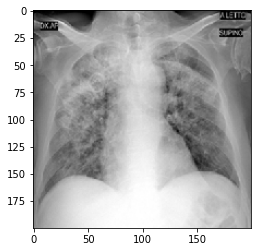

Predicted:Covid
Actual:COVID-34.png



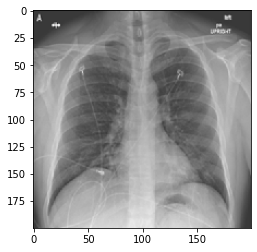

Predicted:Covid
Actual:COVID-35.png



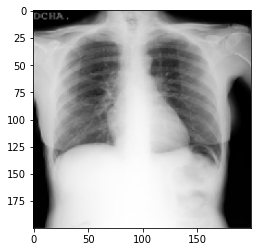

Predicted:Covid
Actual:COVID-36.png



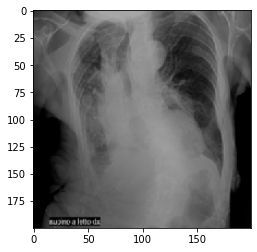

Predicted:Normal
Actual:COVID-37.png



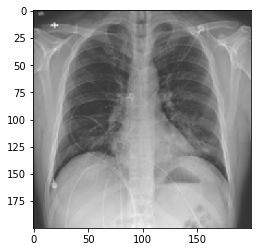

Predicted:Covid
Actual:COVID-38.png



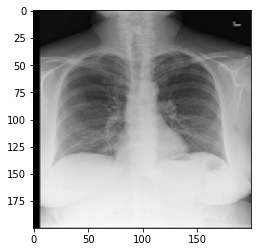

Predicted:Covid
Actual:Normal-55.png



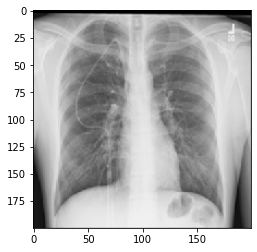

Predicted:Normal
Actual:Normal-56.png



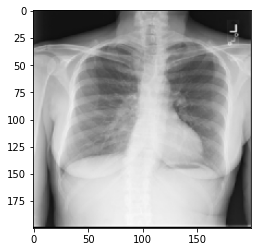

Predicted:Normal
Actual:Normal-57.png



In [22]:
dir_path = 'data/test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X= image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val ==0:
        print('Predicted:Covid')
        print(f'Actual:{i}')
    else:
        print('Predicted:Normal')
        print(f'Actual:{i}')
    print('')

In [59]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")